In [1]:
import numpy as np

In [2]:
import matplotlib.pyplot as plt

In [3]:
from sklearn.utils import shuffle

In [4]:
import nbimporter

In [5]:
from Process_Ecomm import get_data

Importing Jupyter notebook from Process_Ecomm.ipynb


In [6]:
def y2indicator(y, k):
    N = len(y)
    ind = np.zeros((N, K))
    for i in range(N):
        ind[i, y[i]] = 1
    return ind

In [7]:
X, Y = get_data()

Process_Ecomm.ipynb:3: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  {


In [8]:
X, Y = shuffle(X, Y)
Y = Y.astype(np.int32)
D = X.shape[1]
K = len(set(Y))

In [9]:
Xtrain = X[:-100]
Ytrain = Y[:-100]
Ytrain_ind = y2indicator(Ytrain, K)

In [10]:
Xtest = X[-100:]
Ytest = Y[-100:]
Ytest_ind = y2indicator(Ytest, K)

In [11]:
W = np.random.randn(D, K)
b = np.zeros(K)

In [12]:
def softmax(a):
    expA = np.exp(a)
    return expA / expA.sum(axis = 1, keepdims = True)

In [13]:
def forward(X, W, b):
    return softmax(X.dot(W) + b)

In [14]:
def predict(P_Y_given_X):
    return np.argmax(P_Y_given_X, axis = 1)

In [15]:
def classification_rate(Y, P):
    return np.mean(Y == P)

In [16]:
def cross_entropy(T, pY):
    return -np.mean(T * np.log(pY))

In [17]:
train_cost = []
test_cost = []
learning_rate = 0.001
for i in range(10000):
    pYtrain = forward(Xtrain, W, b)
    pYtest = forward(Xtest, W, b)
    
    ctrain = cross_entropy(Ytrain_ind, pYtrain)
    ctest = cross_entropy(Ytest_ind, pYtest)
    train_cost.append(ctrain)
    test_cost.append(ctest)
    
    W -= learning_rate * Xtrain.T.dot(pYtrain - Ytrain_ind)
    b -= learning_rate * (pYtrain - Ytrain_ind).sum(axis = 0)
    
    if i % 1000 == 0:
        print("Iteration = ", i)
        print("Cost Train = ", ctrain)
        print("Cost Test = ", ctest)
        print("======================================")

Iteration =  0
Cost Train =  0.8314621254052303
Cost Test =  0.8543459430155482
Iteration =  1000
Cost Train =  0.08822857382934948
Cost Test =  0.09552601543526165
Iteration =  2000
Cost Train =  0.08440921215939672
Cost Test =  0.08942590260141271
Iteration =  3000
Cost Train =  0.08303142932684666
Cost Test =  0.08710800072758211
Iteration =  4000
Cost Train =  0.08234867251031402
Cost Test =  0.08595465868311435
Iteration =  5000
Cost Train =  0.08195176320963103
Cost Test =  0.08529779333075174
Iteration =  6000
Cost Train =  0.08169745294563238
Cost Test =  0.08489135352597653
Iteration =  7000
Cost Train =  0.08152349696731866
Cost Test =  0.08462543079426675
Iteration =  8000
Cost Train =  0.08139880415398905
Cost Test =  0.08444446023141569
Iteration =  9000
Cost Train =  0.08130623843150218
Cost Test =  0.08431775596045041


In [18]:
print("Final train class. rate = ", classification_rate(Ytrain, predict(pYtrain)))
print("Final test class. rate = ", classification_rate(Ytest, predict(pYtest)))

Final train class. rate =  0.9175
Final test class. rate =  0.88


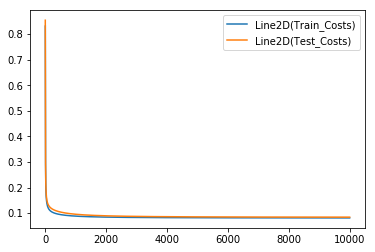

In [19]:
legend1, = plt.plot(train_cost, label = "Train_Costs")
legend2, = plt.plot(test_cost, label = "Test_Costs") 
plt.legend([legend1, legend2])
plt.show()